# OSKM Per State per Day

Compute per state expression of total O/S/K for ChromVAR plots.

Inputs:
1. RNA Seurat object
2. Configs
3. RNA -> ATAC labels

In [1]:
library(ggplot2)
library(Seurat)
library(scales)
library(dplyr)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
DAYS = c("D0", "D2" , "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

### Seurat Object

In [3]:
rna = readRDS("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

### Configs

In [4]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

cluster_config

cluster,colour,description,new_cluster
<int>,<chr>,<chr>,<int>
1,#B03743,Fibroblast,1
2,#E85F6D,Fibroblast-like,3
3,#7C2730,Fibroblast-like,2
4,#F0A118,Intermediate,12
5,#78A824,Pre-iPSC,13
6,#A6D854,Pre-iPSC,14
7,#F01D35,Fibroblast-like,5
8,#13C4A3,iPSC,15
9,#406614,Partially-reprogrammed,10


### ATAC-RNA Cluster Transfer

In [5]:
atac.rna.label = read.table("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/atac.20210717_n62599.cluster.transfer.tsv",
                           header=T)
rownames(atac.rna.label) = atac.rna.label$barcode
atac.rna.label$barcode = NULL

all(rownames(atac.rna.label)==colnames(rna))

# transfer to new cluster
atac.rna.label$atac_new_cluster = cluster_config[atac.rna.label$atac_cluster, "new_cluster"]

head(atac.rna.label)

[1] TRUE

,sample,atac_cluster,atac_new_cluster
,<fct>,<int>,<int>
AAACCCAAGAGTGACC-1,D0,1,1
AAACCCAAGTGCCAGA-1,D0,1,1
AAACCCACACCATTCC-1,D0,1,1
AAACCCACACGCGTCA-1,D0,1,1
AAACCCAGTCCATAGT-1,D0,1,1
AAACCCAGTTATTCTC-1,D0,1,1


## Plotting

In [6]:
all(colnames(rna) == rownames(atac.rna.label))

[1] TRUE

In [13]:
OSKM = c("POU5F1", "SOX2", "KLF4", "MYC")
expr = data.frame(t(as.matrix(rna@assays$RNA@data[OSKM, ])))
colnames(expr) = OSKM
# expr$day = as.vector(unlist(rna$sample))
expr$cluster = as.vector(unlist(atac.rna.label$atac_new_cluster))
head(expr)

,POU5F1,SOX2,KLF4,MYC,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AAACCCAAGAGTGACC-1,0,0,0.5478637,0.0000000,1
AAACCCAAGTGCCAGA-1,0,0,0.0000000,0.9641610,1
AAACCCACACCATTCC-1,0,0,0.5261623,0.5261623,1
AAACCCACACGCGTCA-1,0,0,0.7583202,0.0000000,1
AAACCCAGTCCATAGT-1,0,0,0.0000000,0.0000000,1
AAACCCAGTTATTCTC-1,0,0,0.0000000,0.5299292,1


In [14]:
cluster_cts = data.frame(expr %>% count(cluster))
head(cluster_cts)

,cluster,n
,<int>,<int>
1,1,11041
2,2,140
3,3,10306
4,4,3287
5,5,3183
6,6,934


In [16]:
median_expr_cluster = data.frame(expr %>% group_by(cluster) %>%  summarise_all(median))
median_expr_cluster$count = cluster_cts$n
head(median_expr_cluster)

,cluster,POU5F1,SOX2,KLF4,MYC,count
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0.0000000,0.0000000,0.000000,0.0000000,11041
2,2,0.5283614,0.0000000,1.037418,1.7143152,140
3,3,0.0000000,0.0000000,0.000000,1.3168838,10306
4,4,0.0000000,0.0000000,0.000000,0.7249657,3287
5,5,0.0000000,0.0000000,0.000000,0.0000000,3183
6,6,0.9818284,0.5008009,2.685261,2.4037874,934


In [19]:
sort(median_expr_cluster$count)

[1]   140   523   586   934  1707  1863  3125  3183  3287  4445  4468  6553
[13]  7217 10306 11041

In [20]:
median_expr_cluster

cluster,POU5F1,SOX2,KLF4,MYC,count
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.0000000,0.0000000,0.0000000,0.0000000,11041
2,0.5283614,0.0000000,1.0374180,1.7143152,140
3,0.0000000,0.0000000,0.0000000,1.3168838,10306
4,0.0000000,0.0000000,0.0000000,0.7249657,3287
5,0.0000000,0.0000000,0.0000000,0.0000000,3183
6,0.9818284,0.5008009,2.6852615,2.4037874,934
7,2.8154334,1.7741185,2.0878688,2.3153379,523
8,4.0225348,2.6493121,2.6832974,2.4773640,1707
9,1.8504978,0.8364802,0.8271372,2.0758202,586


In [21]:
ORDER = c(1,15,14,13,12,11,8)

In [110]:
make_plot <- function(colname, option="A") {
    to_plot_df = median_expr_cluster[ORDER, c("cluster", colname)] 
    colnames(to_plot_df) = c("cluster", "expr")
    
    p = ggplot(to_plot_df) +
        geom_tile(aes(x=factor(cluster, levels=ORDER), y=1, fill=expr)) +
        geom_text(aes(x=factor(cluster, levels=ORDER), y=1, 
                      label=as.character(round(expr, 2)),
                     colour=expr>2), size=8) +
        scale_colour_manual(values = c("white", "black")) +
        ylab(colname) +
        scale_fill_viridis_c(option=option, name=colname) +
        theme_void(base_size=10) +
        theme(legend.position = "none",
             axis.title.y=element_text())

    p
}

In [113]:
OCT = make_plot("POU5F1")
SOX = make_plot("SOX2", option="B")
KLF = make_plot("KLF4", option="D")

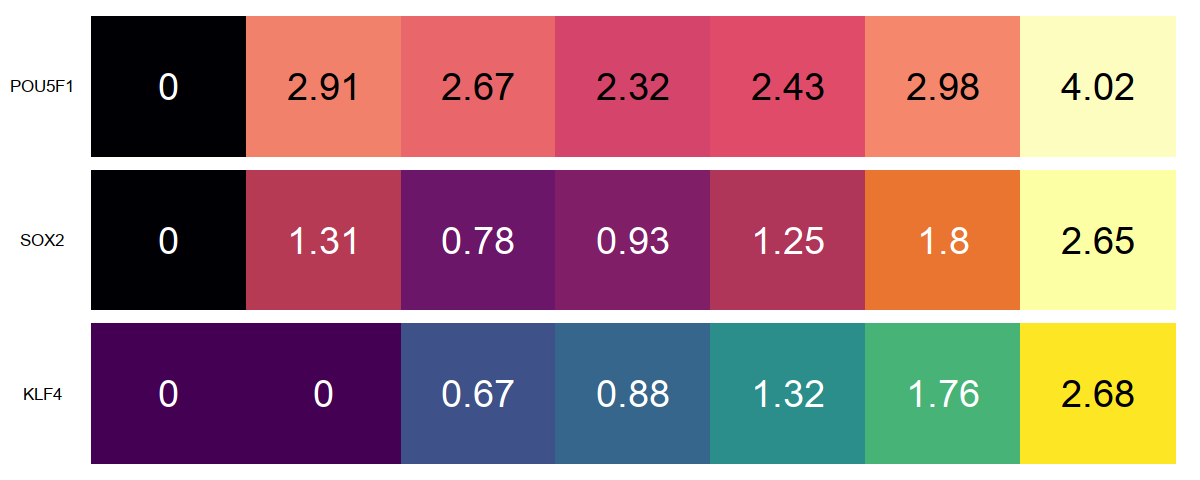

In [114]:
options(repr.plot.width = 10, repr.plot.height = 4)

p = OCT / SOX / KLF

p

In [115]:
ggsave(p, file=sprintf("./subfigs/2021224_clusters_%s_log_expr.pdf", 
                       paste(as.character(ORDER), collapse='_')), 
       height=6, width=10, useDingbats=F)

---

In [177]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 dplyr_1.0.2     scales_1.1.0    Seurat_3.1.5   
[5] ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.0         
 [7] sctransform_0.2.1   tools_3.6.3 